# Homework 1
Create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [ ]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2020-10-03 17:34:29--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv.1’

wines.csv.1         100%[===================>]  10.70K  --.-KB/s    in 0s      

2020-10-03 17:34:29 (95.1 MB/s) - ‘wines.csv.1’ saved [10957/10957]



In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.shape

(178, 14)

In [ ]:
X = df.drop(['Class'], axis=1).values
print(X.shape)
y = df[['Class']].values
print(y.shape)

(178, 13)
(178, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
input = keras.Input(shape=(13,))
mid_units = 10
last_units = 10

layer_1 = Flatten()(input)
layer_2 = Dense(mid_units, activation='relu')(layer_1)
layer_3 = Dense(mid_units, activation='relu')(layer_2)
layer_4 = Dense(mid_units, activation='relu')(layer_3)
layer_5 = Dense(mid_units, activation='relu')(layer_4)
layer_6 = Dense(mid_units, activation='relu')(layer_5)
layer_7 = Dense(mid_units, activation='relu')(layer_6)

layer_8 = keras.layers.concatenate([layer_2, layer_7])
output = Dense(last_units, activation='softmax')(layer_8)

functional_model = keras.Model(input, output)
functional_model.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(), metrics=[sparse_categorical_accuracy])

functional_model.summary()

Model: "functional_94"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_50 (InputLayer)           [(None, 13)]         0                                            
__________________________________________________________________________________________________
flatten_47 (Flatten)            (None, 13)           0           input_50[0][0]                   
__________________________________________________________________________________________________
dense_187 (Dense)               (None, 10)           140         flatten_47[0][0]                 
__________________________________________________________________________________________________
dense_188 (Dense)               (None, 10)           110         dense_187[0][0]                  
______________________________________________________________________________________

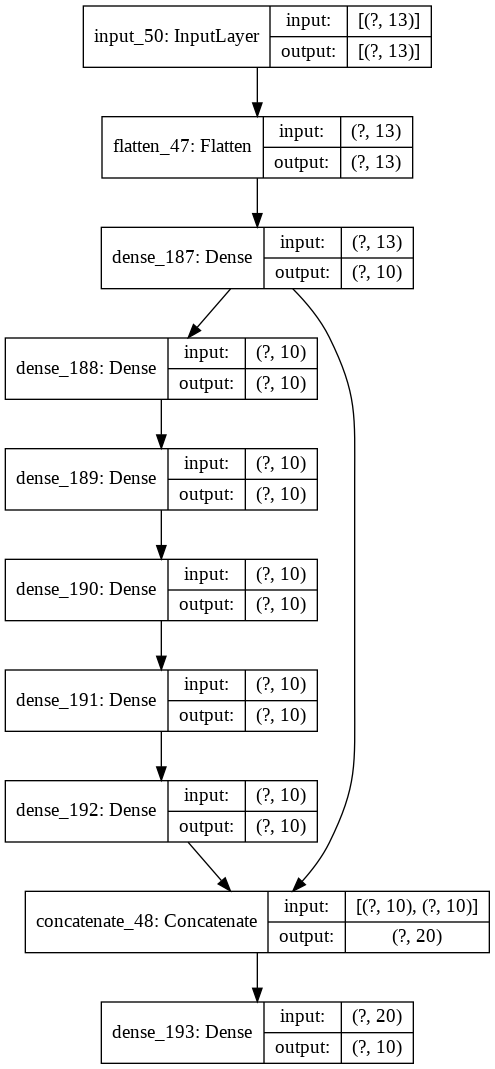

In [ ]:
keras.utils.plot_model(functional_model, "potato.png", show_shapes=True)

In [ ]:
history = functional_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 0s 35ms/step - loss: 280.0874 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 271.2566 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 265.1245 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 255.9295 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 249.9438 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 240.4089 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 234.4984 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 224.4231 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 218.6358 - sparse_categorical_accuracy: 0.0265 - val_loss: 210.6795 - val_sparse_categorical_accuracy: 0.2759
Epoch 6/100
4/4 [==============================] - 0s 5ms/step

In [ ]:
history.history

{'loss': [280.0874328613281,
  265.12451171875,
  249.94383239746094,
  234.49838256835938,
  218.6357879638672,
  208.1358642578125,
  200.62147521972656,
  190.33885192871094,
  180.36512756347656,
  171.9386444091797,
  163.07730102539062,
  154.54727172851562,
  145.29806518554688,
  136.47972106933594,
  127.6168212890625,
  118.45013427734375,
  109.21736907958984,
  99.66280364990234,
  90.68612670898438,
  83.33891296386719,
  77.37024688720703,
  68.8510971069336,
  60.10992431640625,
  51.4537353515625,
  43.634178161621094,
  33.99732971191406,
  24.794023513793945,
  13.10618782043457,
  6.058799743652344,
  9.03297233581543,
  5.298799991607666,
  4.962515830993652,
  3.6705586910247803,
  3.474256992340088,
  2.9277937412261963,
  2.4944517612457275,
  2.422457456588745,
  2.2757785320281982,
  2.1496403217315674,
  2.0327963829040527,
  1.9130202531814575,
  1.8713010549545288,
  2.0732650756835938,
  1.7646148204803467,
  1.6714725494384766,
  1.4382967948913574,
  1.43

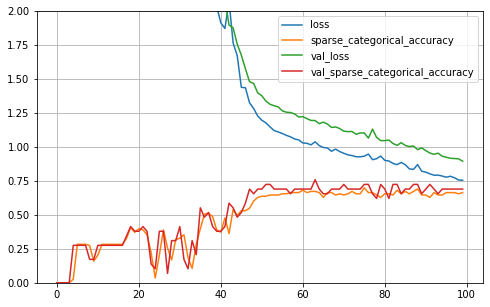

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5), ls='-')

plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()